First image features: 2617
Second image features: 2826
Second image features: 869
Similarity: 33.20596102407337 %
1: (450, 800), 2: (800, 450)
function result: 69.55


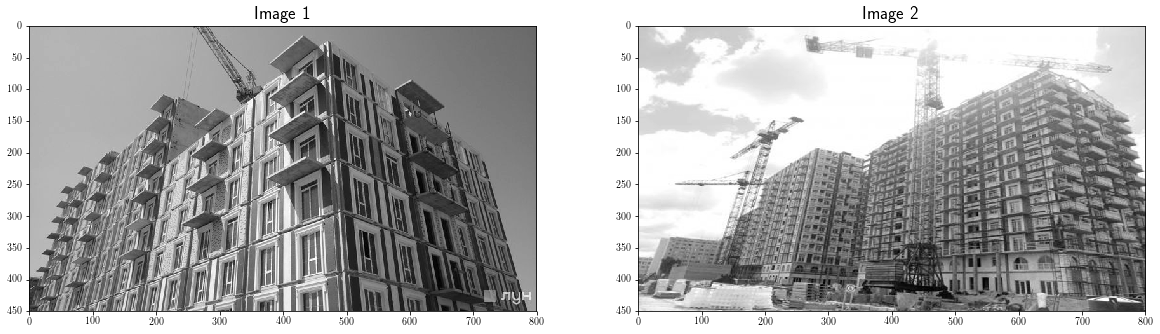

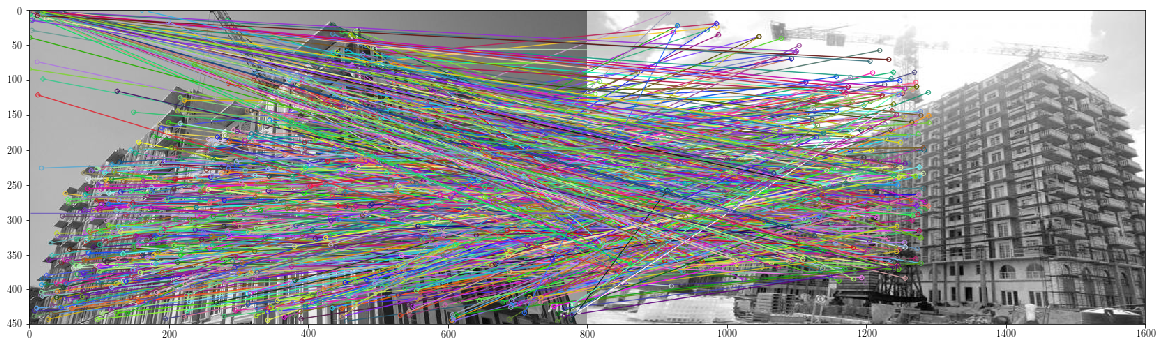

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image, ImageOps

params = {
          "text.usetex": True,
          "text.latex.unicode": True,
          "axes.unicode_minus": True,
         }
plt.rcParams.update(params)

TEST_IMAGE_1 = "imgs/1.jpg"
TEST_IMAGE_2 = "imgs/2.jpg"
TEST_IMAGE_4 = "imgs/4.jpg"

def display_image(img):
    plt.figure(figsize=(20,20))
    plt.subplot(121)
    plt.title(r"Init image", fontsize=18)
    plt.imshow(img['init'], cmap='gray')
    
    plt.subplot(122)
    plt.title(r"Grayscale image", fontsize=18)
    plt.imshow(img['gray'], cmap='gray')
    
def display_image_pair(img1, img2):
    plt.figure(figsize=(20,20))
    plt.subplot(121)
    plt.title(r"Image 1", fontsize=18)
    plt.imshow(img1['gray'], cmap='gray')
    
    plt.subplot(122)
    plt.title(r"Image 2", fontsize=18)
    plt.imshow(img2['gray'], cmap='gray')
    
def display_sift_features(gray_img, color_img, kp):
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

def read_image(color_img):
    img = cv2.imread(color_img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return {'gray' : gray, 'init' : img }

def features_detect(grayscale_image):
    sift = cv2.xfeatures2d.SIFT_create();
    kp, desc = sift.detectAndCompute(grayscale_image, None)
    return {'keypoints': kp, 'descriptor': desc}

def find_similarity(image, image_base)->float:
    """
    Function for comparing two images with SIFT method
    
    @param image: path for image for comparison with base image
    @param image_base: path for base image to compare with
    @return similarity: similarity of corresponding images
    """
    img = cv2.imread(image)
    img_base = cv2.imread(image_base)
    
    gray = cv2.imread(image, cv2.COLOR_BGR2GRAY)
    gray_base = cv2.cvtColor(img_base, cv2.COLOR_BGR2GRAY)
   
    # compare shape and resize if needed
    print("1: {}, 2: {}".format(gray_base.shape[0:2], gray_base.shape[0:2][::-1]))
    if gray.shape[0:2] != gray_base.shape[0:2]:
        gray = cv2.resize(gray, dsize=gray_base.shape[0:2][::-1], interpolation=cv2.INTER_CUBIC)
    
    sift = cv2.xfeatures2d.SIFT_create();
    kp_base, desc_base = sift.detectAndCompute(gray_base, None)
    kp, desc = sift.detectAndCompute(gray, None)
    
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch( desc, desc_base,  k=2 )

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.95*n.distance:
            good.append([m])
    
    features_12 = [len(kp_base), len(kp)]
    
    similarity = 100 * len(good) / min(features_12)
    return float('{0:.2f}'.format(similarity))

def main():
    img_1 = read_image(TEST_IMAGE_2)
    img_2 = read_image(TEST_IMAGE_4)
    
    descr_1 = features_detect(img_1['gray'])['descriptor']
    kp_1 = features_detect(img_1['gray'])['keypoints']
    
    descr_2 = features_detect(img_2['gray'])['descriptor']
    kp_2 = features_detect(img_2['gray'])['keypoints']
    
    if img_2['gray'].shape[0:2] != img_1['gray'].shape[0:2]:
        img_2['gray'] = cv2.resize(img_2['gray'], dsize=img_1['gray'].shape[0:2][::-1], interpolation=cv2.INTER_CUBIC)
    
    display_image_pair(img_1, img_2)
    #display_image(img_1)
    #display_sift_features(img_1['gray'], img_1['init'], kp_1)
          
    #display_image(img_2)
    #display_sift_features(img_2['gray'], img_2['init'], kp_2)
    
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descr_2, descr_1, k=2)

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.95*n.distance:
            good.append([m])
    
    features_12 = [len(kp_1), len(kp_2)]
    print("First image features: {}".format(len(kp_1)))
    print("Second image features: {}".format(len(kp_2)))
    print("Second image features: {}".format(len(good)))
    print("Similarity: {} %".format(100 * len(good) / min(features_12)))
    
    print("function result: {}".format(find_similarity(TEST_IMAGE_4, TEST_IMAGE_2)))
    
    img3 = cv2.drawMatchesKnn(img_1['gray'], kp_1, img_2['gray'], kp_2, good, outImg=None, flags=2)
    plt.figure(figsize=(20,20))
    plt.imshow(img3)

main()